<a href="https://colab.research.google.com/github/gabsgt/Open-Banking_FIAP/blob/main/Correlacao_SELIC_Endividamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entender se existe alguma relação entre a taxa de juros SELIC e a % de endividamento das famílias brasileiras.

### Datasets utilizados: 
- Endividamento: http://api.bcb.gov.br/dados/serie/bcdata.sgs.19882/dados?formato=csv

- SELIC: https://dadosabertos.bcb.gov.br/dataset/11-taxa-de-juros---selic/resource/3d751a0d-afb2-452b-83f2-310a201f8a82

### Habilitando a importação dos dados através do drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


### Importando as bibliotecas que serão utilizadas:



In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing

sns.set()

### Importando os dados

In [ ]:
url_dividas = '/content/drive/MyDrive/FIAP - Atividades/Fase 4 - Open Banking/dividas_familiar.csv'
dividas = pd.read_csv(url_dividas, sep = ';', decimal=',')
dividas.head()

,data,valor
0,01/01/2005,19.32
1,01/02/2005,19.69
2,01/03/2005,20.11
3,01/04/2005,20.55
4,01/05/2005,20.94


In [ ]:
url_selic = '/content/drive/MyDrive/FIAP - Atividades/Fase 4 - Open Banking/selic.csv'
selic = pd.read_csv(url_selic, sep=';', decimal=',')
selic.head()

,data,valor
0,01/01/2011,0.86
1,01/02/2011,0.84
2,01/03/2011,0.92
3,01/04/2011,0.84
4,01/05/2011,0.99


### Agrupando os dois datasets

In [ ]:
merged = pd.merge(selic, dividas, on=['data', 'data'])
merged.head()

,data,valor_x,valor_y
0,01/01/2011,0.86,40.88
1,01/02/2011,0.84,41.06
2,01/03/2011,0.92,41.90
3,01/04/2011,0.84,41.99
4,01/05/2011,0.99,42.28


In [ ]:
merged.rename(columns={'valor_x': 'selic', 'valor_y': 'endividamento'}, inplace=True)

In [ ]:
merged.head()

,data,selic,endividamento
0,01/01/2011,0.86,40.88
1,01/02/2011,0.84,41.06
2,01/03/2011,0.92,41.90
3,01/04/2011,0.84,41.99
4,01/05/2011,0.99,42.28


### Como os valores das colunas 'selic' e 'endividamento' possuem grandezas diferentes, precisamos normaliza-las:

In [ ]:
norm = preprocessing.normalize(merged.drop(['data'], axis=1), axis=0)
df_norm = pd.DataFrame(norm, columns=['selic', 'endividamento'])
df_norm

,selic,endividamento
0,0.100731,0.078064
1,0.098389,0.078408
2,0.107759,0.080012
3,0.098389,0.080184
4,0.115958,0.080738
...,...,...
119,0.018741,0.107797
120,0.017569,0.108981
121,0.015227,0.109878
122,0.023426,0.110738


### Plotando o dataset em scatterplot para entender se existe alguma correlação.

Como podemos ver, os dados não possuem uma correlação clara.

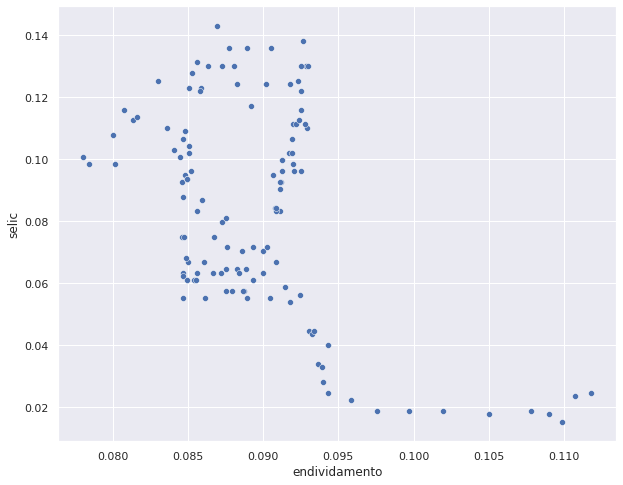

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_norm, x='endividamento', y='selic')

### Cálculo de correlação Pearson:


In [ ]:
correlacao_df = df_norm['selic'].corr(df_norm['endividamento'])
print('A correlação entre selic e endividamento é:',correlacao_df)

A correlação entre selic e endividamento é: -0.5071527656064703


Conclusão: 
- Não existe uma relação linear entre SELIC e Endividamento. A correlação é considerada Moderada Negativa, de acordo com a classificação de Pearson.



### Mesmo após o resultado demonstrado acima, realizei a mesma análise para o ano de 2020.

In [ ]:
merged['data'].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-01-03T00:00:00.000000000', '2011-01-04T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-01-06T00:00:00.000000000',
       '2011-01-07T00:00:00.000000000', '2011-01-08T00:00:00.000000000',
       '2011-01-09T00:00:00.000000000', '2011-01-10T00:00:00.000000000',
       '2011-01-11T00:00:00.000000000', '2011-01-12T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-01-02T00:00:00.000000000',
       '2012-01-03T00:00:00.000000000', '2012-01-04T00:00:00.000000000',
       '2012-01-05T00:00:00.000000000', '2012-01-06T00:00:00.000000000',
       '2012-01-07T00:00:00.000000000', '2012-01-08T00:00:00.000000000',
       '2012-01-09T00:00:00.000000000', '2012-01-10T00:00:00.000000000',
       '2012-01-11T00:00:00.000000000', '2012-01-12T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-01-02T00:00:00.000000000',
       '2013-01-03T00:00:00.000000000', '2013-01-04

In [ ]:
merged['data'] = pd.to_datetime(merged['data'])

In [ ]:
last_year = (merged['data'] >= '2020-1-1') & (merged['data'] <= '2020-12-1')
last_year_date = merged.loc[last_year]
last_year_date

,data,selic,endividamento
108,2020-01-01,0.38,48.91
109,2020-01-02,0.29,49.05
110,2020-01-03,0.34,49.40
111,2020-01-04,0.28,49.18
112,2020-01-05,0.24,49.21
113,2020-01-06,0.21,49.38
114,2020-01-07,0.19,50.18
115,2020-01-08,0.16,51.11
116,2020-01-09,0.16,52.22
117,2020-01-10,0.16,53.39


In [ ]:
d = preprocessing.normalize(last_year_date.drop(['data'], axis=1), axis=0)
scaled_df = pd.DataFrame(d, columns=['selic', 'endividamento'])
scaled_df['data'] = ['2020-01', '2020-02',
       '2020-03', '2020-04',
       '2020-05', '2020-06',
       '2020-07', '2020-08',
       '2020-09', '2020-10',
       '2020-11', '2020-12']
scaled_df

,selic,endividamento,data
0,0.459066,0.275860,2020-01
1,0.350340,0.276650,2020-02
2,0.410743,0.278624,2020-03
3,0.338259,0.277383,2020-04
4,0.289936,0.277552,2020-05
5,0.253694,0.278511,2020-06
6,0.229533,0.283023,2020-07
7,0.193291,0.288268,2020-08
8,0.193291,0.294529,2020-09
9,0.193291,0.301128,2020-10


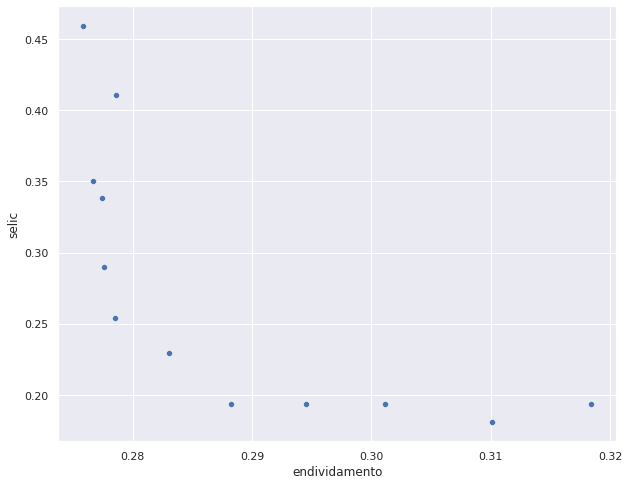

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=scaled_df, x='endividamento', y='selic')

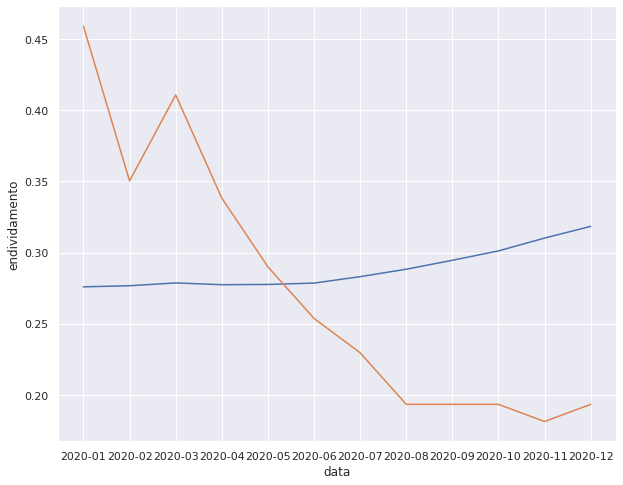

In [ ]:
plt.figure(figsize=[10, 8])
sns.lineplot(data=scaled_df, x='data', y='endividamento')
sns.lineplot(data=scaled_df, x='data', y='selic')

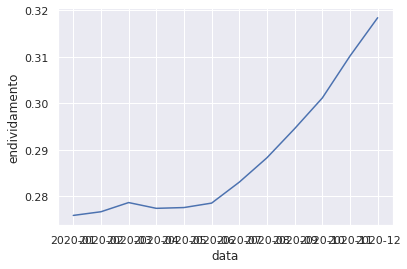

In [ ]:
sns.lineplot(data=scaled_df, x='data', y='endividamento')

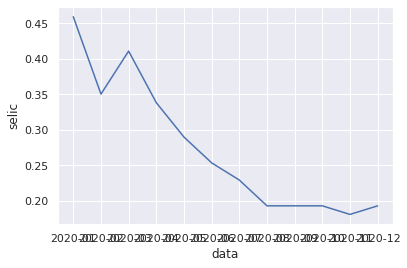

In [ ]:
sns.lineplot(data=scaled_df, x='data', y='selic')

In [ ]:
correlacao = scaled_df['selic'].corr(scaled_df['endividamento'])
print('A correlação entre selic e endividamento é:',correlacao)

A correlação entre selic e endividamento é: -0.7165195829694518


### Conclusão: Da mesma forma que o dado completo, o ano de 2020 não apresenta nenhuma correlação. 

## Conclusão Final: Como não existe uma correlação entre as variáveis, não poderei aplicar o modelo de Regressão Linear.